# WeatherPy
----

#### Observations
- There is a sigificant correction between temperature and latitude in the sample in the northern hemisphere, but not so much for cities in the southern hemisphere.


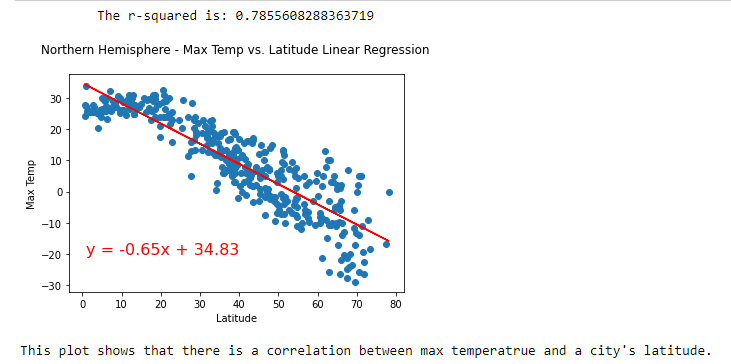

- Based on this scatter, it is warmer closer to the equator.
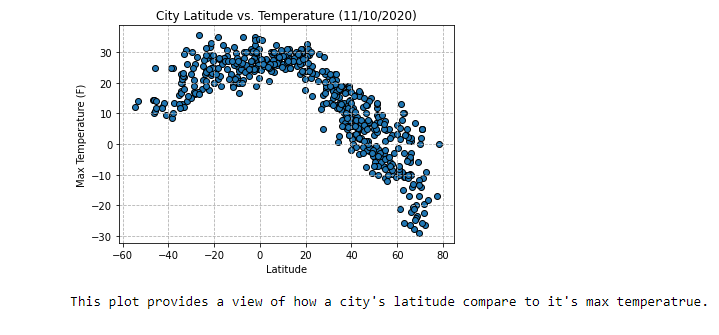

- Regardless of location, wind speed is mostly below 10 mph.
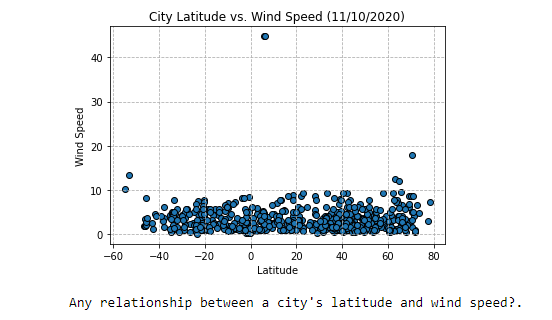

In [130]:
# I initally used pip to install citpy in the console and was successful 
#in retrieving the city and weather data. Next day my notebook would not 
#recongnize citipy as installed. Had to use 'import sys' in the notebook to resolve.

#import sys 
#!{sys.executable} -m pip install citipy

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests 
import time
import pprint
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude

from citipy import citipy

# Output File (CSV)
output_data_file_1 = "output_data/cities_df.cvs"
output_data_file_2 = "output_data/weather_df.cvs"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

print(weather_api_key)

73ceaec8da4e2e6bacfe71e5777e5c6f


## Generate Cities List

In [23]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

#convert list into a dataframe
cities_df = pd.DataFrame(cities)
#print dataframe to a cvs file
cities_df.to_csv(output_data_file_1)
 

In [2]:
# Study data files
weather_metadata_path = "/output_data/weather_df.csv"

# Read the mouse data and the study results
cities = pd.read_csv(weather_metadata_path)

#cities1 = cities(['City'])
# Read weather_df.cvs file and store into Pandas data frame
cities.head(50)
cities1 = cities["City"]


cities1

0              Rikitea
1                Vaini
2                Kapaa
3      Arraial do Cabo
4          Yellowknife
            ...       
554        Bongandanga
555        San Quintín
556            Kajiado
557          Mongoumba
558         Hammerfest
Name: City, Length: 559, dtype: object

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#API Call
#Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


#test data used to for initial runs of the loop
#cities = ["Paris", "London", "Oslo", "Beijing", "Jokie Dokie", "Mumbai", "Manila", "New York", "Seattle", "Dallas", "Taipei"]

# set up lists to hold reponse info


lat = []
lng = []
temp_max = []
city_2 = []
humidity = []
cloudiness = []
wind_speed = []
city_name = []
country = []
date = []
count = 0
set_number = 1




import pprint
#pprint.pprint(response)

#Loop through the list of cities and perform a request for data on each
print(f'Beginning Data Retrieval')
print(f'---------------------------')

#loop trought the cities                        
for city in cities:
    # API requests and append data to emptly lists predefined
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        city_name.append(response['name'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        #counters for the sets
        if count >= 50: 
            count = 1
            set_number =set_number + 1
            city_2.append(city)
        else:
            count += 1
            city_2.append(city)
           
        print(f'Processing Record {count} of Set {set_number} | {city}')  
    
    except KeyError:
        print(f'City Not Found...Skipping...')
    
print(f'-------------------------------')
print(f'     End of Data Retrieval  \n Data for {len(city_name)} cities retrieved')
print(f'-------------------------------')
  
    

Beginning Data Retrieval
---------------------------
Processing Record 1 of Set 1 | Rikitea
Processing Record 2 of Set 1 | Vaini
Processing Record 3 of Set 1 | Kapaa
Processing Record 4 of Set 1 | Arraial do Cabo
Processing Record 5 of Set 1 | Yellowknife
Processing Record 6 of Set 1 | Busselton
Processing Record 7 of Set 1 | Oktyabr'skiy
Processing Record 8 of Set 1 | Maniitsoq
Processing Record 9 of Set 1 | Shangzhi
Processing Record 10 of Set 1 | Albany
Processing Record 11 of Set 1 | Grand Gaube
Processing Record 12 of Set 1 | Cherskiy
Processing Record 13 of Set 1 | Hilo
Processing Record 14 of Set 1 | Bluff
Processing Record 15 of Set 1 | Rio Grande
Processing Record 16 of Set 1 | Lebu
Processing Record 17 of Set 1 | Hong Kong
Processing Record 18 of Set 1 | Zolochiv
Processing Record 19 of Set 1 | Ribeira Grande
Processing Record 20 of Set 1 | Huilong
Processing Record 21 of Set 1 | Mataura
Processing Record 22 of Set 1 | Malanje
Processing Record 23 of Set 1 | Swanzey
Processin

Processing Record 48 of Set 4 | Comodoro Rivadavia
Processing Record 49 of Set 4 | Hadejia
Processing Record 50 of Set 4 | Mar del Plata
Processing Record 1 of Set 5 | Mitsamiouli
Processing Record 2 of Set 5 | Lagoa
Processing Record 3 of Set 5 | Progreso
Processing Record 4 of Set 5 | Muros
Processing Record 5 of Set 5 | Ilulissat
Processing Record 6 of Set 5 | Isla Mujeres
Processing Record 7 of Set 5 | Buala
Processing Record 8 of Set 5 | Bathsheba
Processing Record 9 of Set 5 | Hanzhong
Processing Record 10 of Set 5 | Hobyo
Processing Record 11 of Set 5 | Yala
Processing Record 12 of Set 5 | Puerto Escondido
Processing Record 13 of Set 5 | Ōdachō-ōda
Processing Record 14 of Set 5 | Nsoko
Processing Record 15 of Set 5 | Sitka
Processing Record 16 of Set 5 | Taitung City
Processing Record 17 of Set 5 | Vilhena
Processing Record 18 of Set 5 | Bilma
Processing Record 19 of Set 5 | Jalu
Processing Record 20 of Set 5 | Isla Vista
Processing Record 21 of Set 5 | Pierre
Processing Record 

Processing Record 48 of Set 8 | Hasaki
Processing Record 49 of Set 8 | Cururupu
Processing Record 50 of Set 8 | Dixon
Processing Record 1 of Set 9 | Albacete
Processing Record 2 of Set 9 | Seymchan
Processing Record 3 of Set 9 | Crixás
Processing Record 4 of Set 9 | Gueugnon
Processing Record 5 of Set 9 | Demirci
Processing Record 6 of Set 9 | Muroto-misakicho
Processing Record 7 of Set 9 | Teruel
Processing Record 8 of Set 9 | La Rioja
Processing Record 9 of Set 9 | Hofn
Processing Record 10 of Set 9 | Wanlaweyn
Processing Record 11 of Set 9 | Sabang
Processing Record 12 of Set 9 | Darnah
Processing Record 13 of Set 9 | Paphos
Processing Record 14 of Set 9 | Nouadhibou
Processing Record 15 of Set 9 | Gorontalo
Processing Record 16 of Set 9 | Sinnamary
Processing Record 17 of Set 9 | Loveland
Processing Record 18 of Set 9 | Mehamn
Processing Record 19 of Set 9 | Ikom
Processing Record 20 of Set 9 | Kuusamo
Processing Record 21 of Set 9 | Biltine
Processing Record 22 of Set 9 | Batagay


In [4]:
#put response data in to a dict

weather_dict = {
    'City': city_name,
    "Lat": lat,
    'Lng': lng,
    "Max Temp": temp_max,
"Humidity": humidity, 
'Cloudiness': cloudiness, 
'Wind Speed': wind_speed,
'Country': country,
'Date': date}

print(weather_dict)



{'City': ['Rikitea', 'Vaini', 'Kapaa', 'Arraial do Cabo', 'Yellowknife', 'Busselton', "Oktyabr'skiy", 'Maniitsoq', 'Shangzhi', 'Albany', 'Grand Gaube', 'Cherskiy', 'Hilo', 'Bluff', 'Rio Grande', 'Lebu', 'Hong Kong', 'Zolochiv', 'Ribeira Grande', 'Huilong', 'Mataura', 'Malanje', 'Swanzey', 'Cap Malheureux', 'Tiksi', 'Bud', 'Cabedelo', 'Cidreira', 'Ushuaia', 'Meulaboh', 'Ozinki', 'George Town', 'Hermanus', 'Chapais', 'Port Keats', 'Kumul', 'Bengkulu', 'Khatanga', 'Saint George', 'Tuktoyaktuk', 'Iqaluit', 'Hambantota', 'Tasiilaq', 'Tuatapere', 'Puerto Ayora', 'Saint-Philippe', 'Tadine', 'Narsaq', 'Guápiles', 'Hobart', 'Ust-Tsilma', 'Punta Arenas', 'Tiznit Province', 'Chokurdakh', 'Bambous Virieux', 'Vyshestebliyevskaya', 'Saint Paul Harbor', 'Esperance', 'Camacha', 'Atuona', 'West Plains', 'Barrow', 'Thunder Bay', 'Dikson', 'Aquiraz', 'Portel', 'Cabo San Lucas', 'Soure', 'Saskylakh', 'Butaritari', 'Atar', 'Hithadhoo', 'Oranjemund', 'Chernyshevskiy', 'Carnarvon', 'Darovskoy', 'Flin Flon', 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#convert dict to a dataframe
weather_df = pd.DataFrame(weather_dict)
weather_df



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,23.56,80,28,7.39,PF,1605290420
1,Vaini,-21.20,-175.20,24.00,94,40,3.10,TO,1605290420
2,Kapaa,22.08,-159.32,25.00,78,90,8.70,US,1605290420
3,Arraial do Cabo,-22.97,-42.03,28.00,74,75,4.60,BR,1605290421
4,Yellowknife,62.46,-114.35,-15.00,92,40,3.10,CA,1605290421
...,...,...,...,...,...,...,...,...,...
554,Bongandanga,1.50,21.05,26.11,67,95,1.36,CD,1605290524
555,San Quintín,30.48,-115.95,18.86,54,0,2.89,MX,1605290525
556,Kajiado,-1.85,36.78,19.00,82,75,5.10,KE,1605290525
557,Mongoumba,3.64,18.59,25.18,71,30,1.15,CF,1605290525


In [6]:
#output to cvs
weather_df.to_csv(output_data_file_2)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [53]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,5.850000e+02
mean,19.971504,19.615094,14.359197,73.054701,48.820513,3.382581,1.605034e+09
std,33.514728,89.146433,13.872409,19.757097,41.612493,2.438111,7.482059e+01
min,-54.800000,-179.170000,-31.350000,15.000000,0.000000,0.050000,1.605034e+09
25%,-8.140000,-58.650000,3.580000,63.000000,1.000000,1.500000,1.605034e+09
50%,22.790000,26.920000,18.830000,77.000000,43.000000,2.680000,1.605034e+09
75%,48.830000,98.630000,25.670000,88.000000,90.000000,4.630000,1.605035e+09
max,78.220000,179.320000,36.570000,100.000000,100.000000,12.900000,1.605035e+09


In [54]:
#  Get the indices of cities that have humidity over 100%.

too_humid = weather_df.loc[weather_df["Humidity"] >= 100, :]

#print(too_humid)

#put humid city index numbers into a list
too_humid.index

#print(humid_outliers)


Int64Index([23, 81, 188, 249, 279, 305, 364, 376, 381, 406, 407, 513, 537], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
#drop rows by index
# index values were added in manually...can I make them a variable?

weather_clean_df = weather_df.drop([23, 81, 188, 249, 279, 305, 364, 376, 381, 406, 407, 513, 537])

weather_clean_df.count


<bound method DataFrame.count of                 City    Lat     Lng  Max Temp  Humidity  Cloudiness  \
0            Rikitea -23.12 -134.97     23.56        80          28   
1              Vaini -21.20 -175.20     24.00        94          40   
2              Kapaa  22.08 -159.32     25.00        78          90   
3    Arraial do Cabo -22.97  -42.03     28.00        74          75   
4        Yellowknife  62.46 -114.35    -15.00        92          40   
..               ...    ...     ...       ...       ...         ...   
554      Bongandanga   1.50   21.05     26.11        67          95   
555      San Quintín  30.48 -115.95     18.86        54           0   
556          Kajiado  -1.85   36.78     19.00        82          75   
557        Mongoumba   3.64   18.59     25.18        71          30   
558       Hammerfest  70.66   23.68      5.00        80          75   

     Wind Speed Country        Date  
0          7.39      PF  1605290420  
1          3.10      TO  1605290420  


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

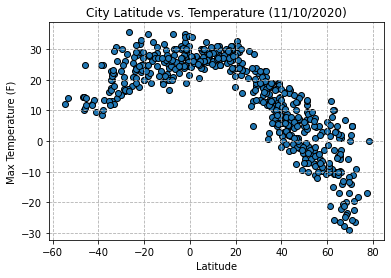

It appears that it is actually warmer near the equator.


In [19]:
#setup variables for plotting
city_lat = weather_clean_df["Lat"]
max_temp = weather_clean_df["Max Temp"]

#generate scatter plot
plt.title('City Latitude vs. Temperature (11/10/2020)')
plt.scatter(city_lat,max_temp,edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",linestyle="--", axis="both")
plt.show()
print(f"It appears that it is actually warmer near the equator.")
#plt.savefig("output_data/fig1.png")

## Latitude vs. Humidity Plot

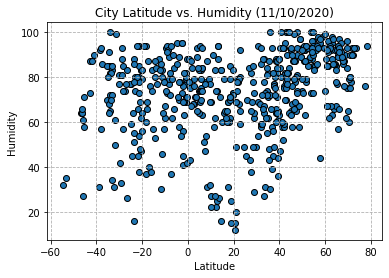

Is there any relationship between the humidity and latitude of a city?


In [11]:
#setup variables plotting
city_lat = weather_clean_df["Lat"]
humidity = weather_clean_df["Humidity"]

#generate scatter plot
plt.title('City Latitude vs. Humidity (11/10/2020)')
plt.scatter(city_lat,humidity,edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid (b=True,which="major",linestyle="--", axis="both")
plt.show()
print(f"Is there any relationship between the humidity and latitude of a city?")
#plt.savefig("output_data/fig2.png")

## Latitude vs. Cloudiness Plot

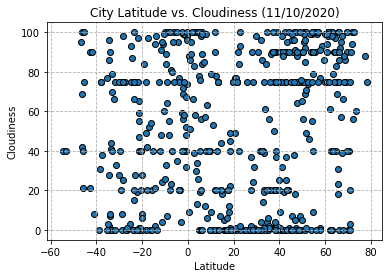

Is a city's cloudiness determined in any way by it's latitude? Probably not.


In [13]:
#setup variables for plotting
city_lat = weather_clean_df["Lat"]
cloudiness = weather_clean_df["Cloudiness"]

#generate scatter plot
plt.title('City Latitude vs. Cloudiness (11/10/2020)')
plt.scatter(city_lat,cloudiness,edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid (b=True,which="major",linestyle="--", axis="both")
plt.show()
print(f"Is a city's cloudiness determined in any way by it's latitude? Probably not.")
#plt.savefig("output_data/fig3.png")

## Latitude vs. Wind Speed Plot

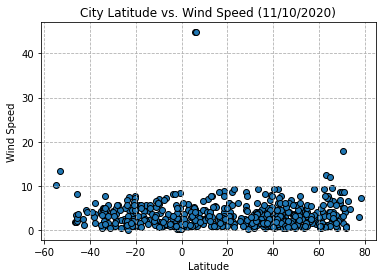

Any relationship between a city's latitude and wind speed?.


In [14]:
#setup variables for plotting
city_lat = weather_clean_df["Lat"]
wind_speed = weather_clean_df["Wind Speed"]

#generate scatter plot
plt.title('City Latitude vs. Wind Speed (11/10/2020)')
plt.scatter(city_lat,wind_speed,edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid (b=True,which="major",linestyle="--", axis="both")
plt.show()
print(f"Any relationship between a city's latitude and wind speed?")
#plt.savefig("output_data/fig4.png")

## Linear Regression

In [16]:
#set up data and variables for plotting.  Northern hemisphere vs Southern city data.

#northern hemi cities
n_city_lat = weather_clean_df[weather_clean_df['Lat'] >= 0]


# #southern hemi cities
s_city_lat = weather_clean_df[weather_clean_df['Lat'] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

          The r-squared is: 0.7855608288363719


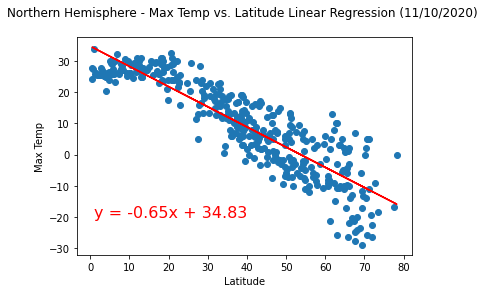

This plot shows that there is a correlation between max temperatrue and a city's latitude.


In [24]:
#setup x and y variables for plotting

city_lat = n_city_lat["Lat"]
max_temp = n_city_lat["Max Temp"]


#calculate the correlation coefficent and linear regression model
x_values = city_lat
y_values = max_temp

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot the graph and print the r-squared value
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,-20),fontsize=16,color="red")
print(f"          The r-squared is: {rvalue**2}")
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression (11/10/2020) \n')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
print(f"This plot shows that there is a correlation between max temperatrue and a city's latitude.")

#plt.savefig("output_data/fig5.png")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

          The r-squared is: 0.401007341027448


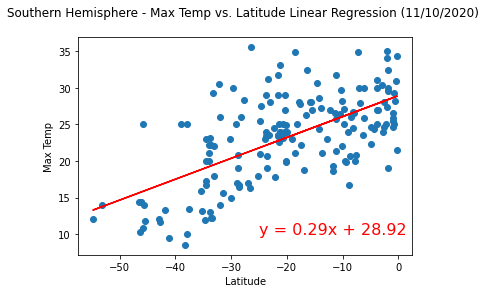

low correlation between temp and latitidue.


In [23]:
#setup x and y variables for plotting

#southern hemi cities
city_lat = s_city_lat["Lat"]
max_temp = s_city_lat["Max Temp"]


#calculate the correlation coefficent and linear regression model
x_values = city_lat
y_values = max_temp

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot the graph and print the r-squared value
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=16,color="red")
print(f"          The r-squared is: {rvalue**2}")
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression (11/10/2020) \n')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

print(f"low correlation between temp and latitidue.")

#plt.savefig("output_data/fig6.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

          The r-squared is: 0.1653067866636731


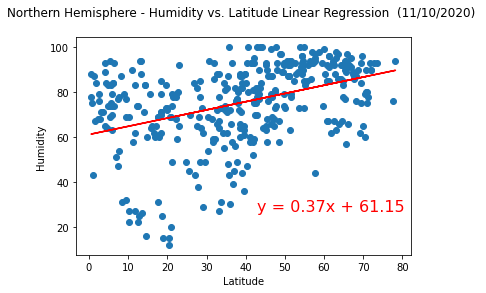

Plot shows low or no correlation between humidity and a city's latitude.


In [25]:
#setup x and y variables for plotting

city_lat = n_city_lat["Lat"]
humidity = n_city_lat["Humidity"]


#calculate the correlation coefficent and linear regression model
x_values = city_lat
y_values = humidity

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot the graph and print the r-squared value
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(43,27),fontsize=16,color="red")
print(f"          The r-squared is: {rvalue**2}")
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression  (11/10/2020) \n')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

print(f"Plot shows low or no correlation between humidity and a city's latitude.")

#plt.savefig("output_data/fig7.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

          The r-squared is: 0.019765083861623345


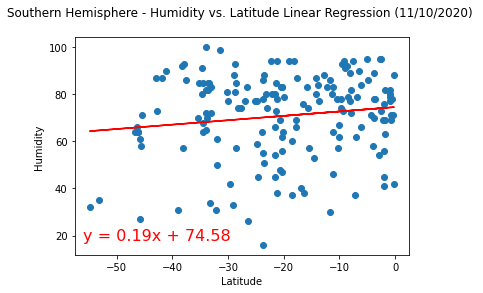

No relationship between humidty and a city's latitude.


<Figure size 432x288 with 0 Axes>

In [21]:
#setup x and y variables for plotting

city_lat = s_city_lat["Lat"]
humidity = s_city_lat["Humidity"]


#calculate the correlation coefficent and linear regression model
x_values = city_lat
y_values = humidity

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot the graph and print the r-squared value
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-56,18),fontsize=16,color="red")
print(f"          The r-squared is: {rvalue**2}")
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression (11/10/2020) \n')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

print(f"No relationship between humidty and a city's latitude.")

plt.savefig("output_data/fig8.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

          The r-squared is: 0.05762804519391065


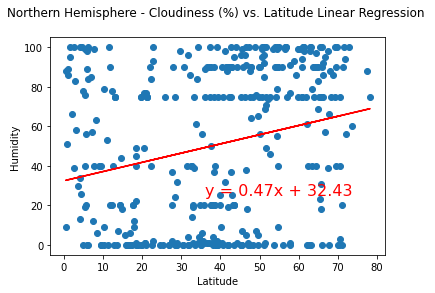

There is no relationship between cloudiness and a city's latitude.


In [26]:
#setup x and y variables for plotting

city_lat = n_city_lat["Lat"]
cloudiness = n_city_lat["Cloudiness"]


#calculate the correlation coefficent and linear regression model
x_values = city_lat
y_values = cloudiness

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot the graph and print the r-squared value
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(36,25),fontsize=16,color="red")
print(f"          The r-squared is: {rvalue**2}")
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression \n')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

print(f"There is no relationship between cloudiness and a city's latitude.")

#plt.savefig("output_data/fig9.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

          The r-squared is: 0.03602685492408581


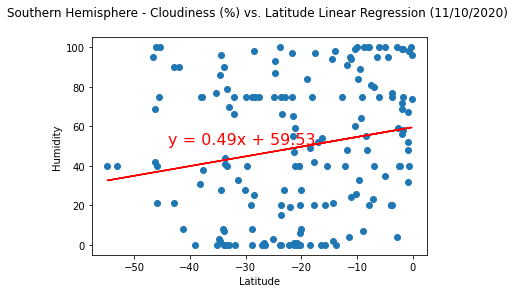

there is no correlation between cloudiness and a city's latitude.


<Figure size 432x288 with 0 Axes>

In [27]:
#setup x and y variables for plotting

city_lat = s_city_lat["Lat"]
cloudiness = s_city_lat["Cloudiness"]


#calculate the correlation coefficent and linear regression model
x_values = city_lat
y_values = cloudiness

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot the graph and print the r-squared value
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-44,51),fontsize=16,color="red")
print(f"          The r-squared is: {rvalue**2}")
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (11/10/2020) \n')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

print(f"there is no correlation between cloudiness and a city's latitude.")

plt.savefig("output_data/fig10.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

          The r-squared is: 0.0011167187038801677


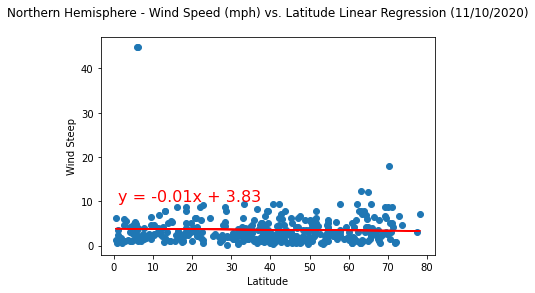

There is no real relationship between wind speed and a city's latitude.


In [28]:
#setup x and y variables for plotting

city_lat = n_city_lat["Lat"]
wind_speed = n_city_lat["Wind Speed"]


#calculate the correlation coefficent and linear regression model
x_values = city_lat
y_values = wind_speed

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot the graph and print the r-squared value
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,10),fontsize=16,color="red")
print(f"          The r-squared is: {rvalue**2}")
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (11/10/2020)\n')
plt.xlabel('Latitude')
plt.ylabel('Wind Steep')
plt.show()

print(f"There is no real relationship between wind speed and a city's latitude.")

#plt.savefig("output_data/fig11.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

          The r-squared is: 0.033679789882142354


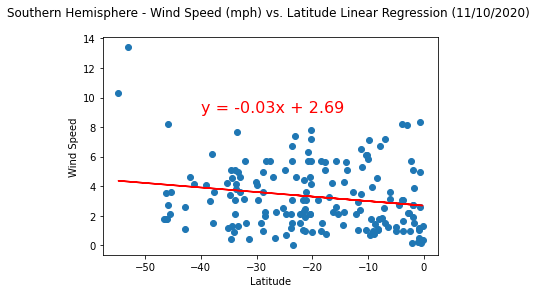

Plot shows no real relationship between wind speed and a city's latitude.


In [29]:
#setup x and y variables for plotting

city_lat = s_city_lat["Lat"]
wind_speed = s_city_lat["Wind Speed"]


#calculate the correlation coefficent and linear regression model
x_values = city_lat
y_values = wind_speed

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot the graph and print the r-squared value
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,9),fontsize=16,color="red")
print(f"          The r-squared is: {rvalue**2}")
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (11/10/2020) \n')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

print(f"Plot shows no real relationship between wind speed and a city's latitude.")

#plt.savefig("output_data/fig12.png")